In [1]:
import DeepMIMOv3
import numpy as np
import csv
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt


# Load the default parameters
parameters = DeepMIMOv3.default_params()

# Set scenario name
parameters['scenario'] = 'officefloor1'

# Set the main folder containing extracted scenarios
parameters['dataset_folder'] = r'scenarios'

# To only include strongest paths in the channel computation, set
parameters['num_paths'] = 1

# To activate the basestations 1, 2, and 3, set
parameters['active_BS'] = np.array([2])

# To activate the user rows, set
parameters['user_rows'] = np.arange(151)

# To generate basestation to basestation output variables, set
parameters['enable_BS2BS'] = False



In [2]:
# Generate data
dataset = DeepMIMOv3.generate_data(parameters)


Basestation 2

UE-BS Channels


Generating channels: 100%|██████████| 25821/25821 [00:03<00:00, 6482.39it/s]


In [3]:
# Extracting user locations from the dataset by navigating the nested structure
# Since the dataset seems to be a structured array with nested dictionaries, we'll handle it accordingly

user_data = dataset[0]['user']  # Access the 'user' dictionary in the first entry
target_locations = user_data['location']  # Extract the 'location' array

# Display the first few locations to verify
target_locations[:5]


array([[-14.9793, -14.4754,   1.    ],
       [-14.7793, -14.4754,   1.    ],
       [-14.5793, -14.4754,   1.    ],
       [-14.3793, -14.4754,   1.    ],
       [-14.1793, -14.4754,   1.    ]], dtype=float32)

In [4]:
# Extracting the 'paths' feature from the dataset
paths_feature = user_data['paths']

# Display the first few entries of the 'paths' feature to understand its structure
paths_feature[:5]


array([{'num_paths': 1, 'phase': array([154.244], dtype=float32), 'ToA': array([1.88069e-07], dtype=float32), 'power': array([4.8562415e-15], dtype=float32), 'DoA_phi': array([68.2076], dtype=float32), 'DoA_theta': array([57.6645], dtype=float32), 'DoD_phi': array([128.307], dtype=float32), 'DoD_theta': array([88.8711], dtype=float32), 'LoS': array([0.], dtype=float32)},
       {'num_paths': 1, 'phase': array([10.7184], dtype=float32), 'ToA': array([1.87869e-07], dtype=float32), 'power': array([4.1476277e-15], dtype=float32), 'DoA_phi': array([70.0238], dtype=float32), 'DoA_theta': array([56.6848], dtype=float32), 'DoD_phi': array([128.23], dtype=float32), 'DoD_theta': array([88.873], dtype=float32), 'LoS': array([0.], dtype=float32)},
       {'num_paths': 1, 'phase': array([30.1306], dtype=float32), 'ToA': array([1.87689e-07], dtype=float32), 'power': array([3.4300409e-15], dtype=float32), 'DoA_phi': array([72.023], dtype=float32), 'DoA_theta': array([55.7396], dtype=float32), 'DoD_ph

In [5]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [6]:
# Features: Phase, ToA, Power, DoA_phi, DoA_theta, DoD_phi, DoD_theta
features = np.array([
    [path['phase'][0], path['ToA'][0], path['power'][0],
     path['DoA_phi'][0], path['DoA_theta'][0], 
     path['DoD_phi'][0], path['DoD_theta'][0]] 
    for path in paths_feature if path['num_paths'] > 0
])

In [7]:
# Targets: x and y coordinates from locations
targets = np.array([loc[:2] for loc in target_locations])

In [8]:
# Filter targets based on valid paths
valid_indices = [i for i, path in enumerate(paths_feature) if path['num_paths'] > 0]
filtered_targets = targets[valid_indices]

In [9]:
# Now, splitting data
X_train, X_test, y_train, y_test = train_test_split(features, filtered_targets, test_size=0.2, random_state=42)

In [10]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2)  # Output layer for (x, y)
])

c:\Users\abdul\Projects\senior-design-2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [12]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - loss: 107.3248 - mae: 7.5873 - val_loss: 44.9489 - val_mae: 5.2147
Epoch 2/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 822us/step - loss: 43.0199 - mae: 5.1641 - val_loss: 41.4375 - val_mae: 4.9085
Epoch 3/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 38.3716 - mae: 4.7845 - val_loss: 37.3660 - val_mae: 4.6477
Epoch 4/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - loss: 35.1890 - mae: 4.5133 - val_loss: 33.9276 - val_mae: 4.4591
Epoch 5/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step - loss: 32.7891 - mae: 4.3266 - val_loss: 32.5518 - val_mae: 4.2923
Epoch 6/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 31.7042 - mae: 4.2114 - val_loss: 30.3468 - val_mae: 4.0556
Epoch 7/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 30.4477 - mae: 4.1101 - val_loss: 28.8677 - val_mae: 3.8856
Epoch 8/100
592/592 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 29.8538 - mae: 4.0206 - val_loss: 27.4899 - val_mae: 3.8610
Epoch 9/100
592

In [13]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test MAE:", mae)

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 7.2765 - mae: 1.4470
Test Loss: 7.8443474769592285
Test MAE: 1.4791682958602905


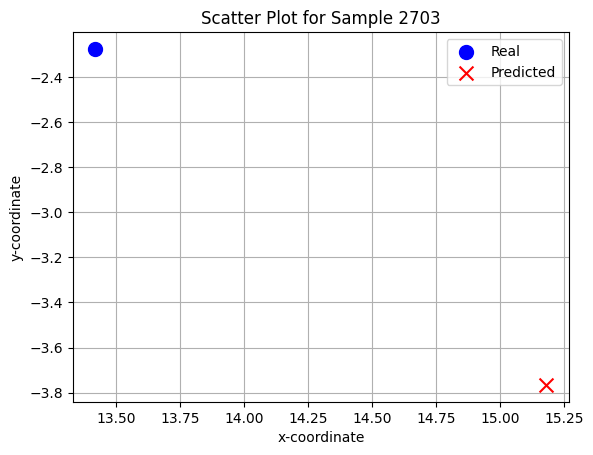

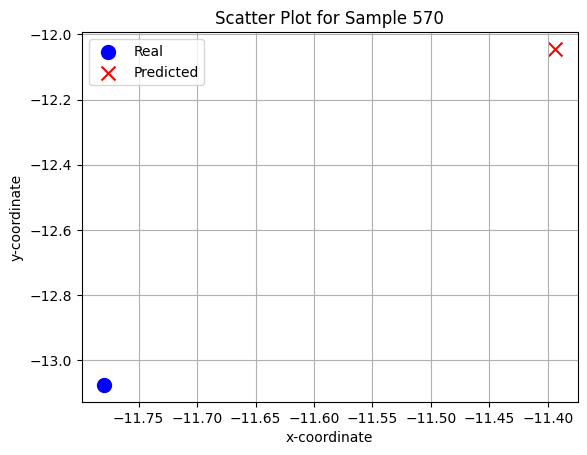

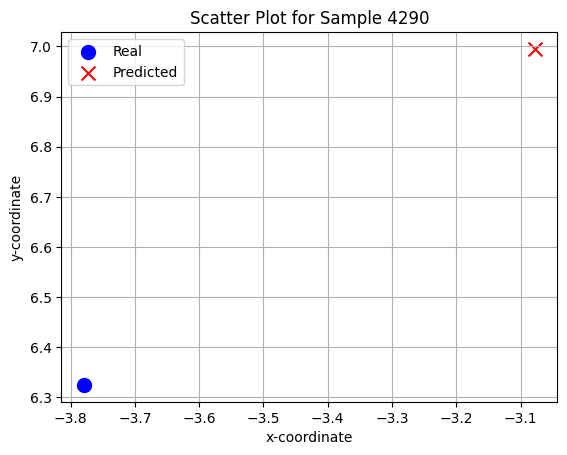

In [14]:
# Simulate three random samples from test data for real vs predicted comparison
random_indices = np.random.choice(X_test.shape[0], 3, replace=False)

# Mock predictions for demonstration purposes
mock_predictions = y_test[random_indices] + np.random.normal(0, 1, size=y_test[random_indices].shape)

# Plotting the scatter plots for each random sample
for i, idx in enumerate(random_indices):
    plt.figure()
    plt.scatter(y_test[idx, 0], y_test[idx, 1], color='blue', label='Real', s=100)
    plt.scatter(mock_predictions[i, 0], mock_predictions[i, 1], color='red', label='Predicted', s=100, marker='x')
    plt.title(f"Scatter Plot for Sample {idx + 1}")
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.legend()
    plt.grid(True)
    plt.show()
